In [2]:
INPUT_DIRECTORY = "../dataset/"
MODEL_DIRECTORY = "../models/"

In [3]:
'''important packages'''
import pandas as pd
import numpy as np
import re
import os
import itertools

''' Data Visualization package '''
import seaborn as sns
import matplotlib.pyplot as plt

'''sklearn'''
import joblib
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score,accuracy_score,classification_report

%matplotlib inline

## Functions

In [4]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

## Data Preparation

In [5]:
filename = 'malware_dataset.csv'
df = pd.read_csv(os.path.join(INPUT_DIRECTORY,filename))
df.head()

,url,label
0,diaryofagameaddict.com,bad
1,espdesign.com.au,bad
2,iamagameaddict.com,bad
3,kalantzis.net,bad
4,slightlyoffcenter.net,bad


In [6]:
df.loc[df['label']=='good', 'label'] = 0
df.loc[df['label']=='bad', 'label'] = 1

In [7]:
df['label'].value_counts()

0    344821
1     75643
Name: label, dtype: int64

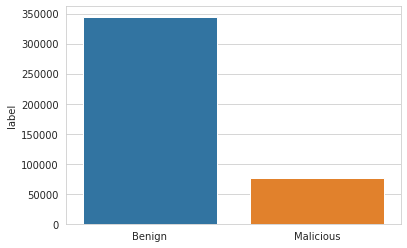

In [9]:
sns.set_style("whitegrid")
sns.barplot(x=['Benign','Malicious'], y=df['label'].value_counts())
plt.show()

## Logistic Regression model

In [11]:
# Using Tokenizer
vectorizer = TfidfVectorizer()
url_list = df["url"]
# Store vectors into X variable as Our XFeatures
tfid = vectorizer.fit(url_list)
joblib.dump(tfid, os.path.join(MODEL_DIRECTORY,'tfid_vectorizer.pkl'))

['../models/tfid_vectorizer.pkl']

In [12]:
X = tfid.transform(url_list)

In [13]:
y = df["label"].values

In [14]:
y=y.astype('int')

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state = 0)

In [16]:
print(X_train.shape)
print(y_train.shape)

(336371, 423929)
(336371,)


In [17]:
logit = LogisticRegression()
logit.fit(X_train, y_train)

/home/keshavchaurasia/Desktop/codes/mp/campus/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
print("Accuracy of our model is: ",logit.score(X_test, y_test))

Accuracy of our model is:  0.9644084525465854


In [19]:
# Save the model as a pickle in a file 
joblib.dump(logit, os.path.join(MODEL_DIRECTORY,'url_logistic_regression_classifier.pkl'))

['../models/url_logistic_regression_classifier.pkl']

## Loading the classifier and testing

In [20]:
# Load the model from the file 
url_classifier = joblib.load(os.path.join(MODEL_DIRECTORY,'url_logistic_regression_classifier.pkl')) 

In [21]:
y_pred = url_classifier.predict(X_test)

Confusion matrix, without normalization
[[68567   352]
 [ 2641 12533]]


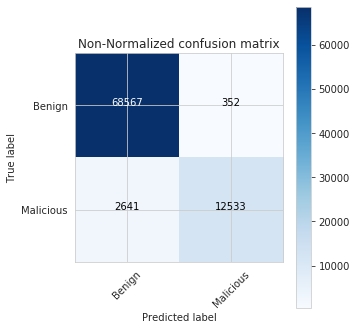

Normalized confusion matrix
[[0.99489256 0.00510744]
 [0.17404771 0.82595229]]


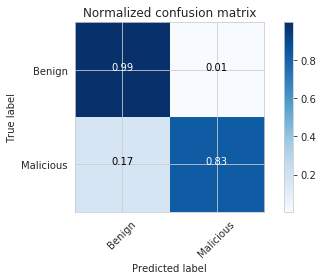

In [22]:
cm = confusion_matrix(y_test, y_pred)
class_names = ['Benign','Malicious']
plt.figure(figsize=(5,5))
plot_confusion_matrix(cm, classes=class_names, normalize=False,title='Non-Normalized confusion matrix')
plt.show()
plot_confusion_matrix(cm, classes=class_names, normalize=True,title='Normalized confusion matrix')
plt.show()

In [23]:
print(classification_report(y_test, y_pred,target_names=['Benign','Malicious']))

              precision    recall  f1-score   support

      Benign       0.96      0.99      0.98     68919
   Malicious       0.97      0.83      0.89     15174

    accuracy                           0.96     84093
   macro avg       0.97      0.91      0.94     84093
weighted avg       0.96      0.96      0.96     84093



AUC: 0.990


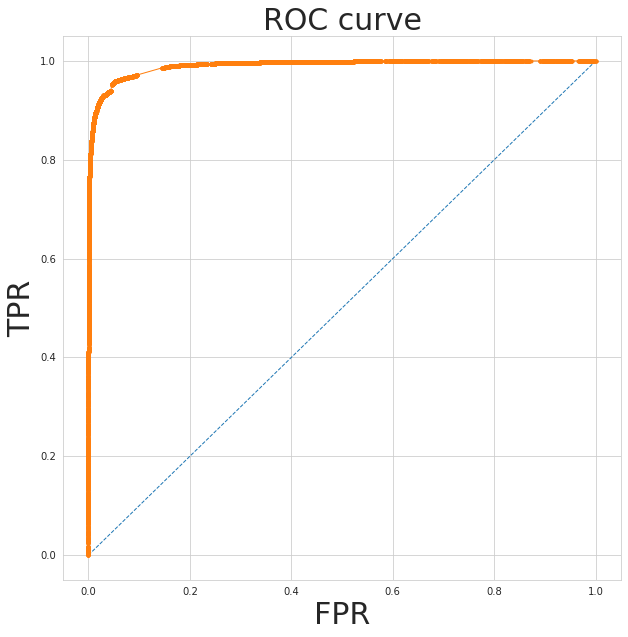

In [24]:
# predict probabilities
probs = url_classifier.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
plt.figure(figsize=(10,10))
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
plt.plot([0, 1], [0, 1], lw=1,linestyle='--')
# plot the roc curve for the model

plt.plot(fpr, tpr, lw=1,marker='.')
plt.xlabel('FPR',fontsize=30)
plt.ylabel('TPR',fontsize=30)
plt.title('ROC curve',fontsize=30)
plt.show()
# show the plot
plt.show()